In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
validation_labels = np.load('output_data/jobs_validation_labels.npy')
predicted_labels = np.load('output_data/jobs_predicted_labels.npy')

job_names = {
 0: 'Сварщик',
 1: 'Оператор станков с ЧПУ',
 2: 'Контролёр ОТК',
 3: 'Машинист',
 4: 'Слесарь, сантехник',
 5: 'Инженер-конструктор, инженер-проектировщик',
 6: 'Оператор производственной линии',
 7: 'Монтажник',
 8: 'Разнорабочий',
 9: 'Токарь, фрезеровщик, шлифовщик',
 10: 'Инженер по эксплуатации',
 11: 'Электромонтажник',
 12: 'Геолог',
 13: 'Инженер ПТО, инженер-сметчик',
 14: 'Механик',
 15: 'Научный специалист, исследователь',
 16: 'Инженер ПНР',
 17: 'Инженер по качеству',
 18: 'Технолог',
 19: 'Геодезист',
 20: 'Инженер по охране труда и технике безопасности, инженер-эколог',
 21: 'Лаборант',
 22: 'Специалист по сертификации',
 23: 'Инженер-электроник, инженер-электронщик',
 24: 'Мастер по ремонту оборудования, техники'}

# Confusion Matrix

Since the classes are unbalanced, the values in the matrix rows are relative to the total number of entries in a class.

In [72]:
label_counts = pd.read_csv('output_data/label_counts.csv')
label_counts

,label,count_all,count_train,count_validation
0,0,31023,27869,3154
1,1,2401,2154,247
2,2,2599,2329,270
3,3,14038,12653,1385
4,4,33472,30225,3247
5,5,52502,47181,5321
6,6,23667,21280,2387
7,7,4289,3874,415
8,8,38663,34841,3822
9,9,11401,10280,1121


In [17]:
conf_matrix = confusion_matrix(validation_labels, predicted_labels)
conf_matrix = pd.DataFrame(conf_matrix)
conf_matrix['total'] = conf_matrix.sum(axis=1)
conf_matrix = conf_matrix/conf_matrix['total']

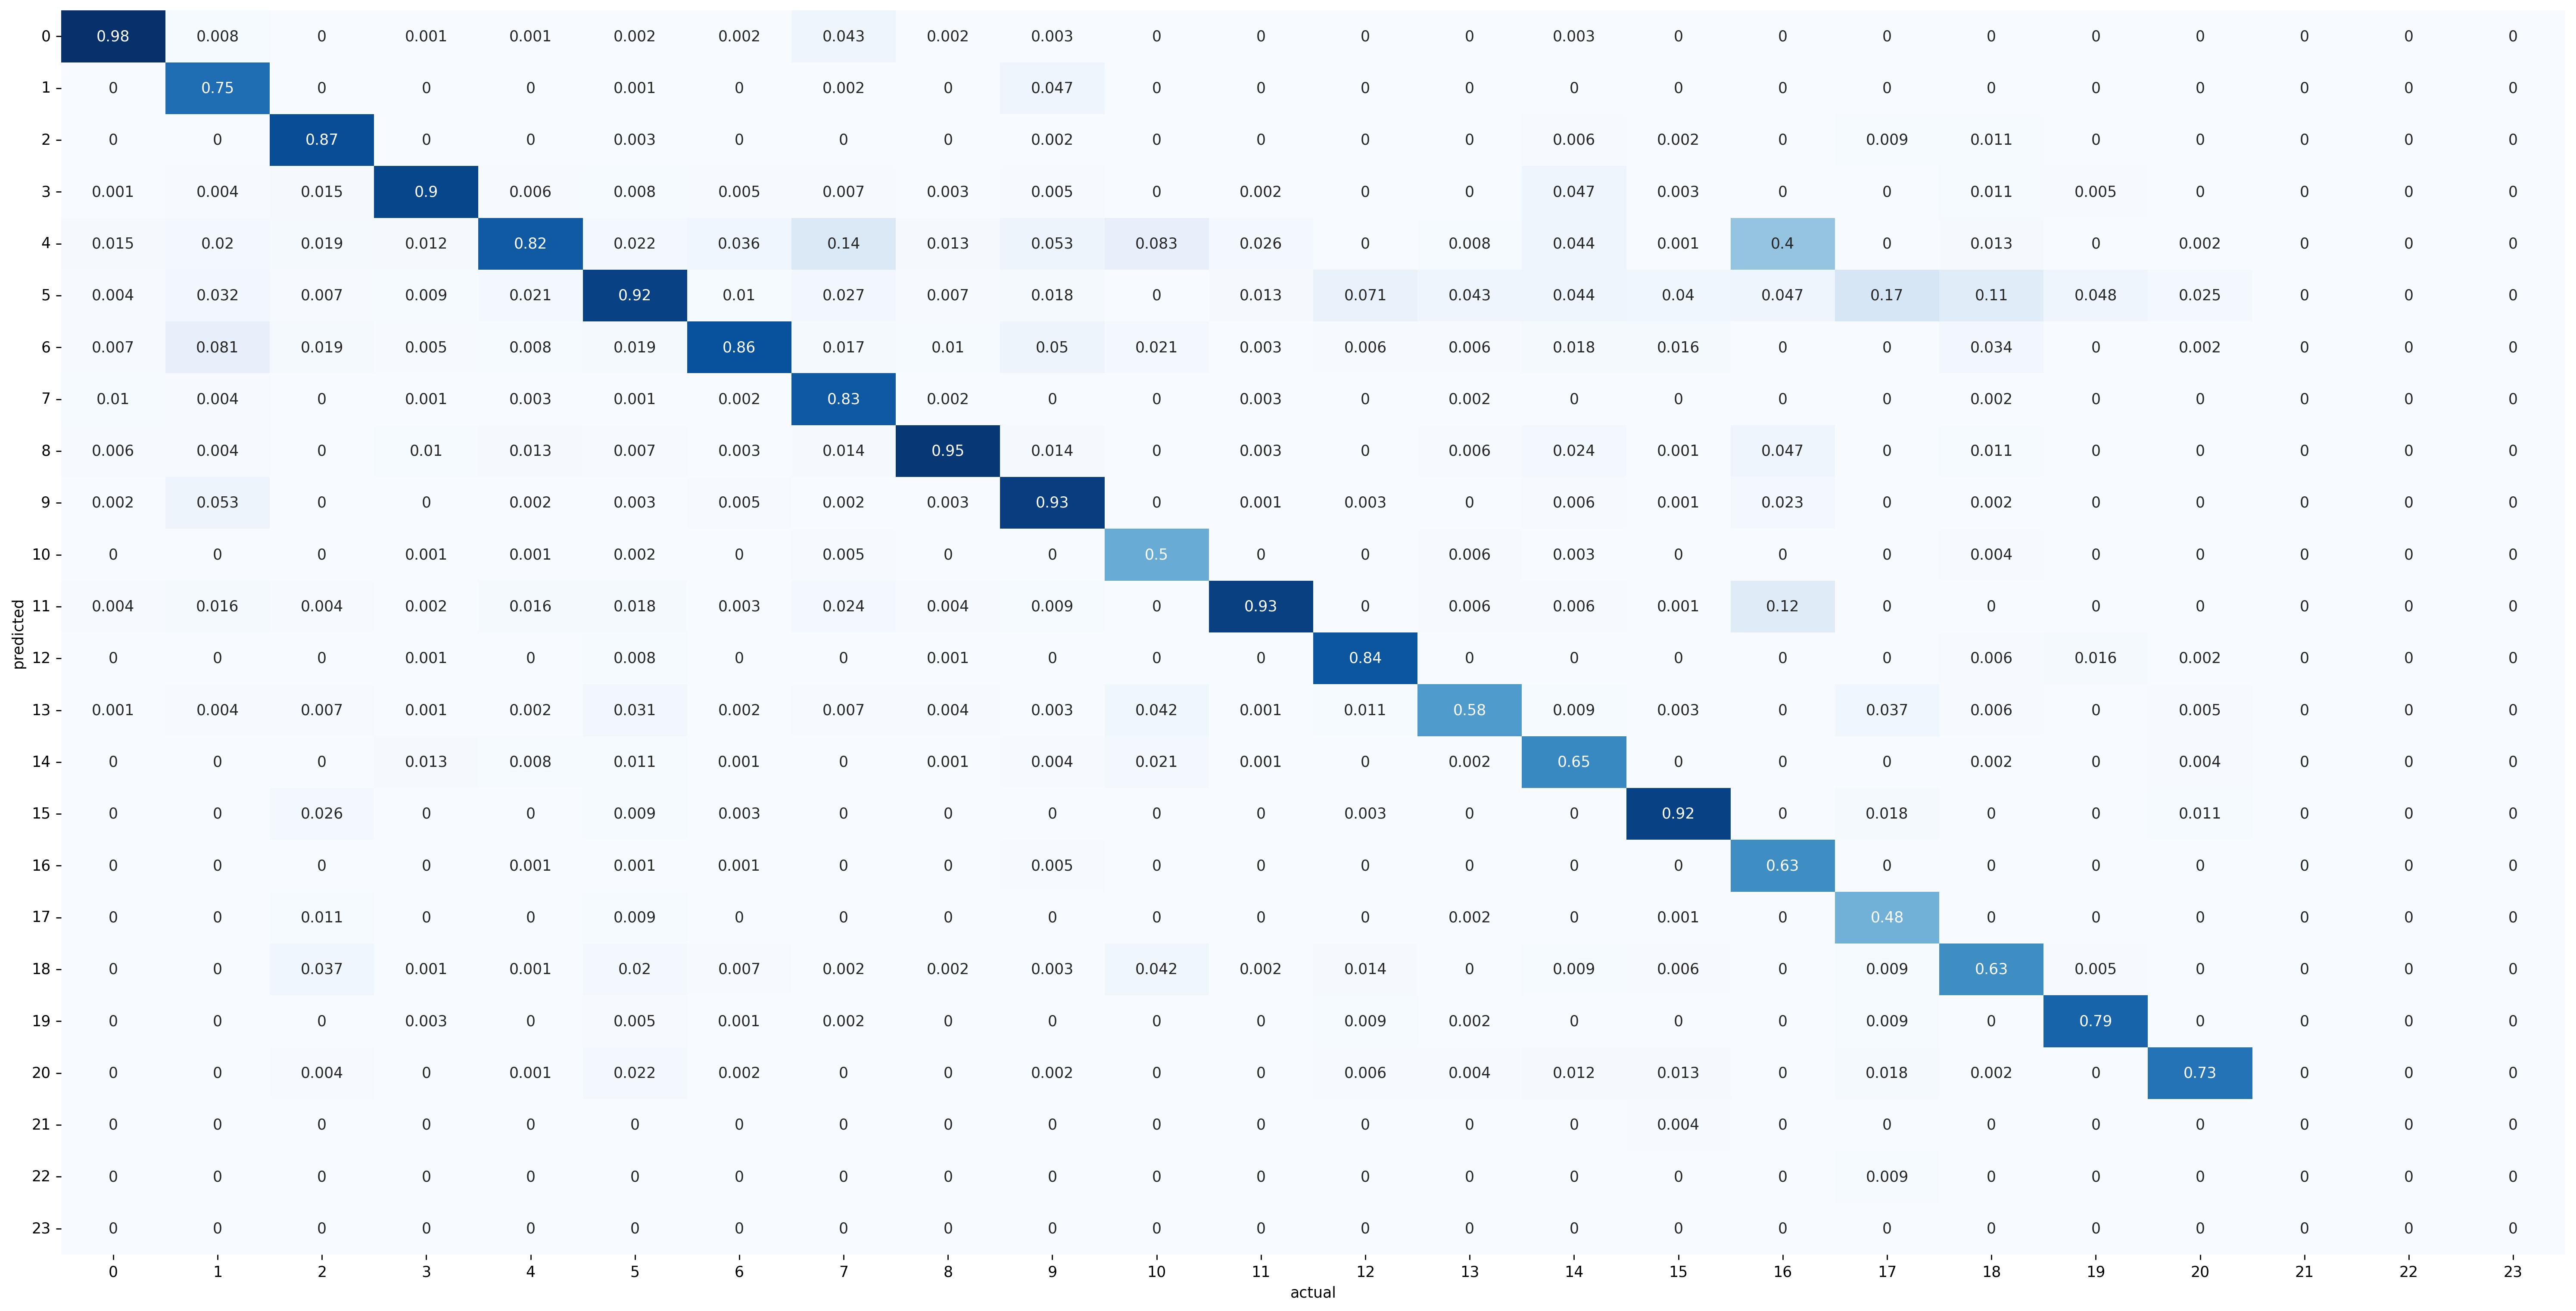

In [69]:
plt.figure(figsize=(30,15),dpi=250)
sns.heatmap(conf_matrix.drop('total',axis=1).round(3),cmap='Blues',annot=True,cbar=False)
plt.yticks(rotation=0)
plt.ylabel('predicted')
plt.xlabel('actual')
plt.show()

# Classification Metrics

In [19]:
report = classification_report(validation_labels, predicted_labels, output_dict=True)
report = classification_report(validation_labels, predicted_labels,target_names=[*job_names.values()][:-1],
                               output_dict=True)
report = pd.DataFrame(report).transpose()
#report.to_csv('classification_report.csv')

report

,precision,recall,f1-score,support
Сварщик,0.950368,0.983513,0.966656,3154.000000
Оператор станков с ЧПУ,0.767635,0.748988,0.758197,247.000000
Контролёр ОТК,0.855072,0.874074,0.864469,270.000000
Машинист,0.935581,0.901805,0.918382,1385.000000
"Слесарь, сантехник",0.909029,0.824761,0.864847,3247.000000
"Инженер-конструктор, инженер-проектировщик",0.820007,0.921255,0.867687,5321.000000
Оператор производственной линии,0.909212,0.860075,0.883961,2387.000000
Монтажник,0.737634,0.826506,0.779545,415.000000
Разнорабочий,0.947327,0.955259,0.951277,3822.000000
"Токарь, фрезеровщик, шлифовщик",0.811482,0.933095,0.868050,1121.000000
